# Niche reconstruction and spatial domain detection

Author: Francesca Drummer

In this notebook we will cover:

1. Graph construction and analysis of spatial transcriptomics data using Squidpy
2. CellCharter
3. BANSKY

In [2]:
# Data analysis and ML imports
import pandas as pd
import matplotlib.pyplot as plt

# single-cell imports
import squidpy as sq
import scanpy as sc

# Methods
import graphcompass as gc

from pathlib import Path

/ictstr01/groups/ml01/workspace/francesca.drummer/mamba/envs/spatial/lib/python3.9/site-packages/numba/core/decorators.py:282: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)


## Dataset

We will use the Xenium AD dataset from the previous notebooks here.

In [3]:
PATH = "/home/icb/francesca.drummer/1-Projects/"

In [4]:
# load adata
adata = sc.read_h5ad(Path(PATH, 'xenium_mouse_ad_annotated.h5ad'))
adata

AnnData object with n_obs × n_vars = 350209 × 347
    obs: 'cell_id', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'region', 'cell_labels', 'condition', 'time', 'batch_key', 'leiden_res0_25', 'leiden_res0_5', 'leiden_res1', 'cell_types'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'cell_types_colors', 'dea_leiden_res0_25', 'dendrogram_leiden_res0_25', 'leiden', 'leiden_res0_25_colors', 'leiden_res0_5_colors', 'leiden_res1_colors', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    obsp: 'connectivities', 'distances'

In [12]:
print(adata.X[:10, :10])

  (1, 0)	1.3076923
  (2, 8)	1.0
  (3, 8)	6.7999997
  (4, 2)	0.9066667
  (4, 3)	2.72
  (8, 4)	1.3783784
  (8, 8)	1.3783784
  (9, 1)	0.92307687
  (9, 3)	1.8461537
  (9, 8)	0.92307687


## 1. Cell neighborhood detection via graph construction

Spatial transcriptomics data can be represented as graphs with cells as nodes and edges as relations. Depending on the technology (imaging-based or sequencing-based) different assumptions can be made for the graph structure. 

Here we will explore graph construction and cell neighborhood analysis using the squidpy `sq.gr` module on imaging-based data. 

*Information for graph reconstruciton for sequencing-based data can be found [here](https://squidpy.readthedocs.io/en/stable/notebooks/examples/graph/compute_spatial_neighbors.html).*

First we construct two different graph from the ST data based on number of neighbors to include.  

/ictstr01/groups/ml01/workspace/francesca.drummer/mamba/envs/spatial/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:981: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/ictstr01/groups/ml01/workspace/francesca.drummer/mamba/envs/spatial/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:981: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/ictstr01/groups/ml01/workspace/francesca.drummer/mamba/envs/spatial/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:981: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/ictstr01/groups/ml01/workspace/francesca.drummer/mamba/envs/spatial/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:981: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/ictstr01/gr

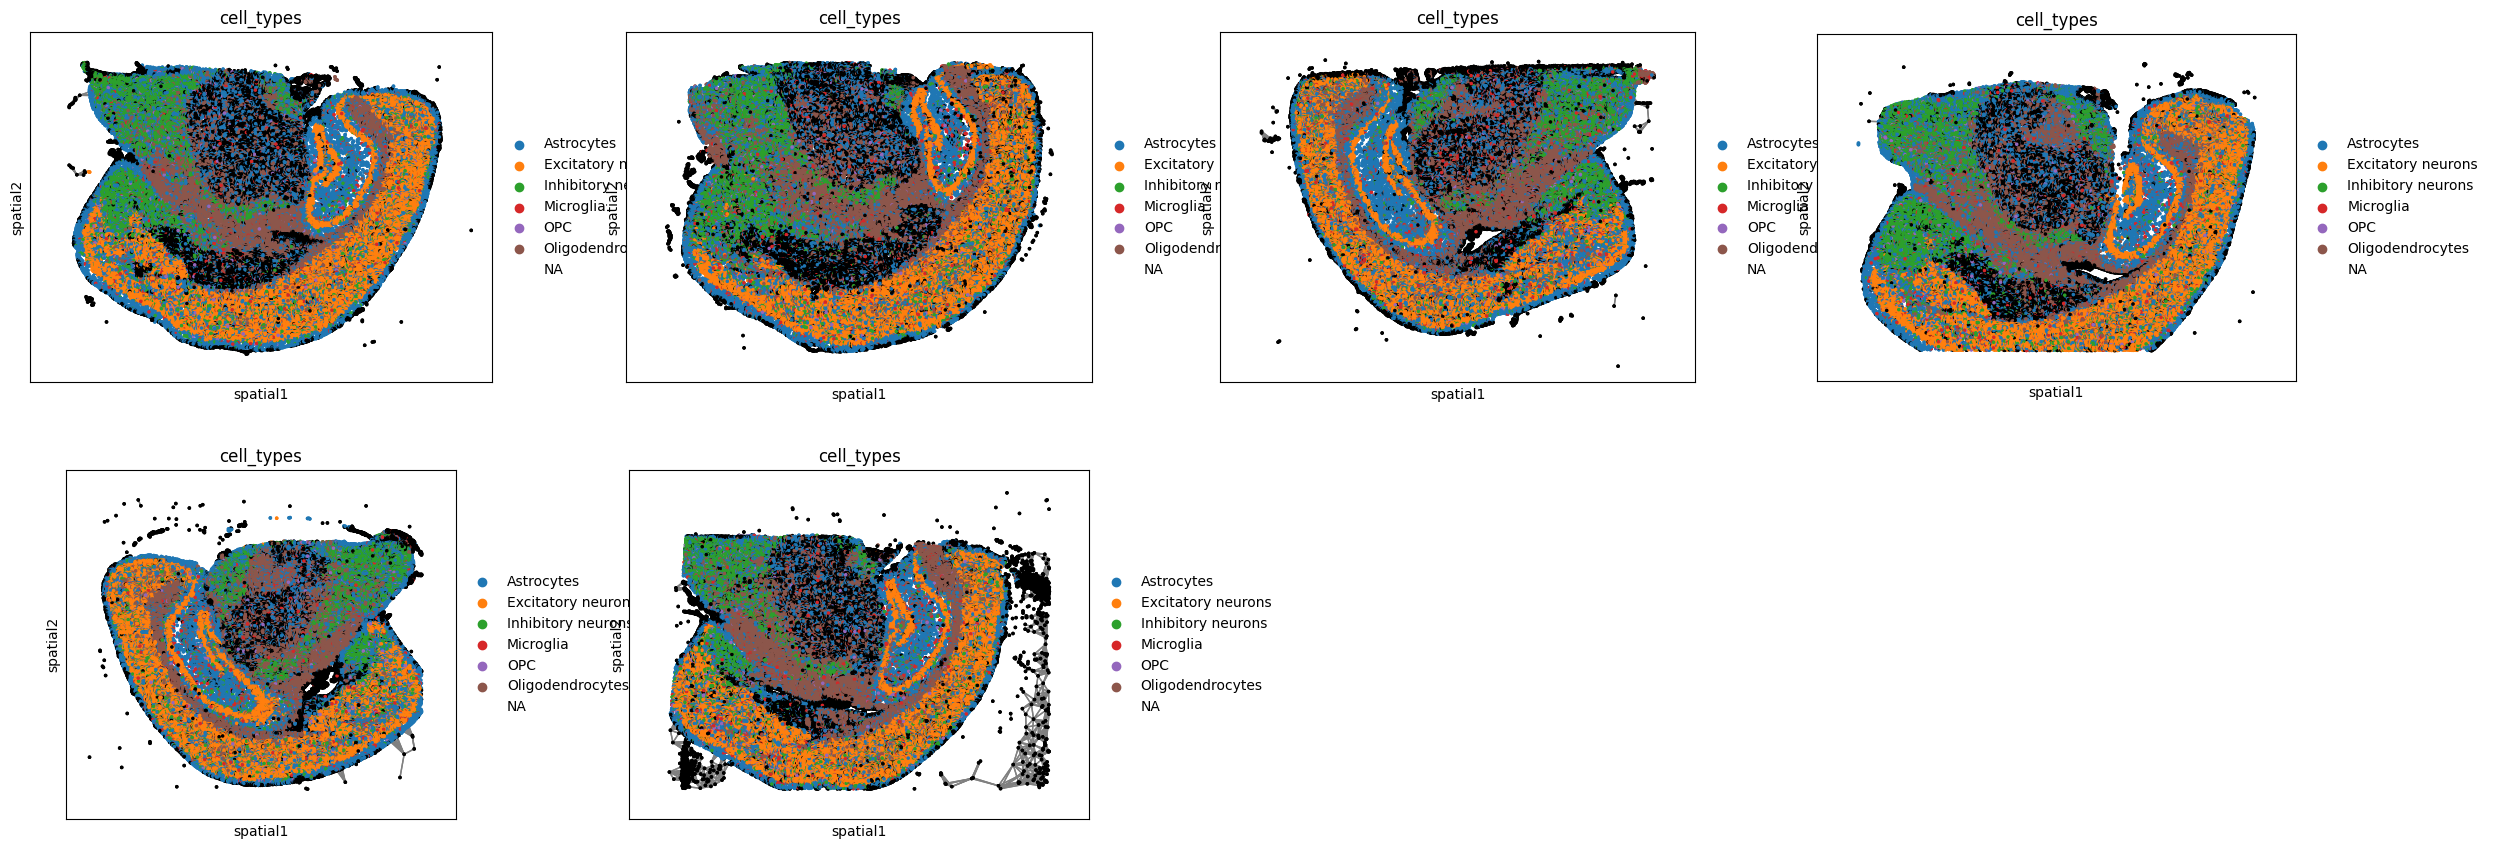

In [4]:
sq.gr.spatial_neighbors(adata, n_neighs=10, coord_type="generic", key_added = 'neighs_based_spatial')
sq.pl.spatial_scatter(
    adata,
    shape=None,
    library_key = 'batch_key',
    color="cell_types",
    connectivity_key="neighs_based_spatial_connectivities",
    size=10,
)

/ictstr01/groups/ml01/workspace/francesca.drummer/mamba/envs/spatial/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:981: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/ictstr01/groups/ml01/workspace/francesca.drummer/mamba/envs/spatial/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:981: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/ictstr01/groups/ml01/workspace/francesca.drummer/mamba/envs/spatial/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:981: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/ictstr01/groups/ml01/workspace/francesca.drummer/mamba/envs/spatial/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:981: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/ictstr01/gr

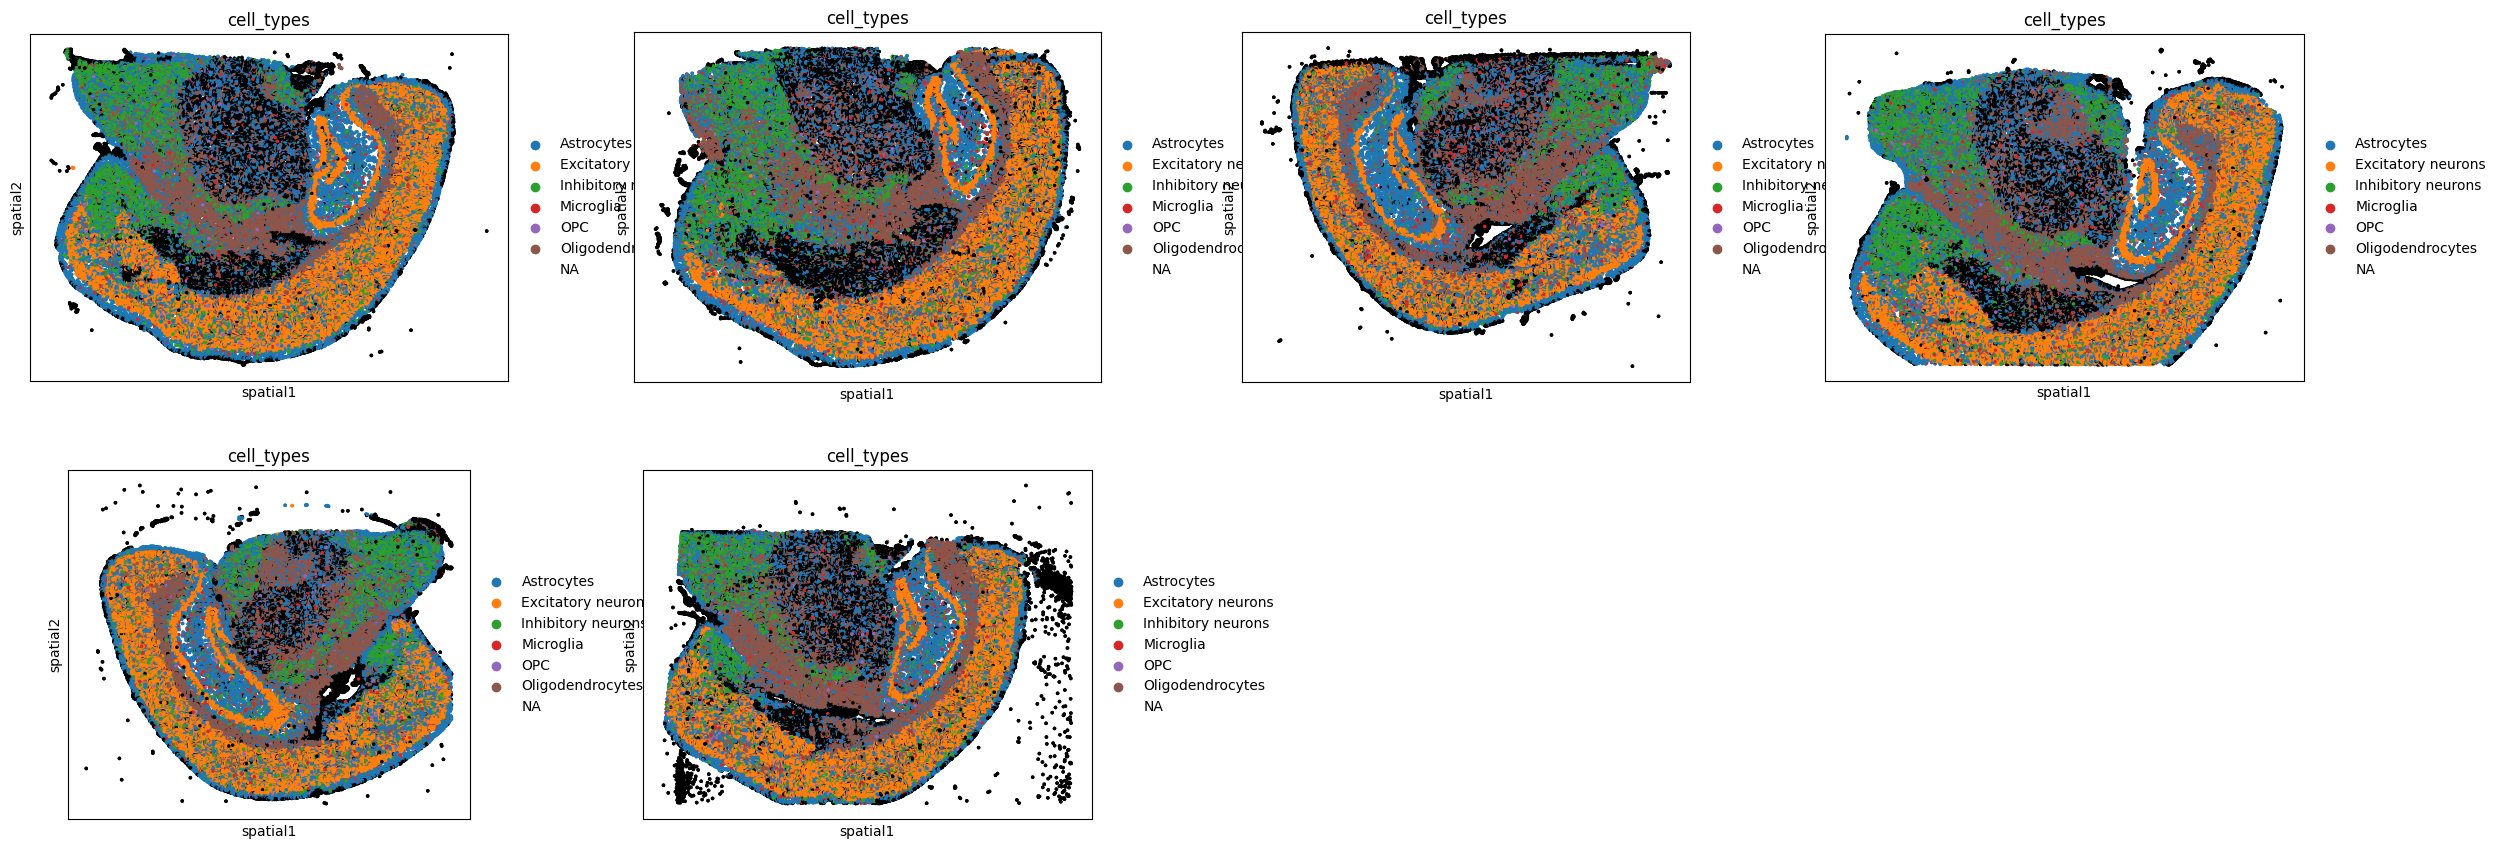

In [5]:
sq.gr.spatial_neighbors(adata, radius=0.3, coord_type="generic", key_added = 'radius_based_spatial')
sq.pl.spatial_scatter(
    adata,
    shape=None,
    library_key = 'batch_key', 
    color="cell_types",
    connectivity_key="radius_based_spatial_connectivities",
    size=10,
)

First differences across the graphs can be observed by visual inspection, e.i. the cells that are further away from the clear brain structures are connected in the clostest neighbor approach but unconnected in the radius-based approach. Some other differences are harder to observe like dependencies in the more dense connected regions. For this Squidpy provides a number of statistics to better understand the underlying statistics.

**Task 1:** Try out some qualitative analysis from Squidpy to identify distinctions between the graphs e.i. using the [centrality score](https://squidpy.readthedocs.io/en/stable/notebooks/examples/graph/compute_centrality_scores.html) and [neighborhood enrichment](https://squidpy.readthedocs.io/en/stable/notebooks/examples/graph/compute_nhood_enrichment.html). 

/ictstr01/groups/ml01/workspace/francesca.drummer/mamba/envs/spatial/lib/python3.9/site-packages/IPython/core/events.py:82: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  func(*args, **kwargs)
/ictstr01/groups/ml01/workspace/francesca.drummer/mamba/envs/spatial/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


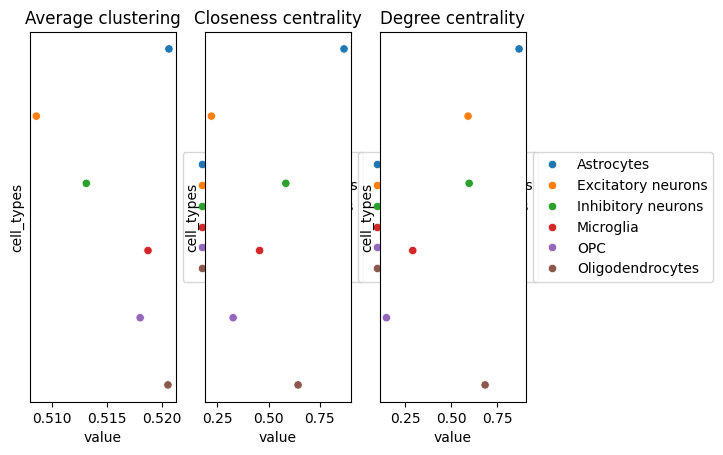

In [10]:
sq.gr.centrality_scores(adata, cluster_key = "cell_types", connectivity_key = "neighs_based_spatial")
sq.pl.centrality_scores(adata, cluster_key = "cell_types")

/ictstr01/groups/ml01/workspace/francesca.drummer/mamba/envs/spatial/lib/python3.9/site-packages/IPython/core/events.py:82: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  func(*args, **kwargs)
/ictstr01/groups/ml01/workspace/francesca.drummer/mamba/envs/spatial/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


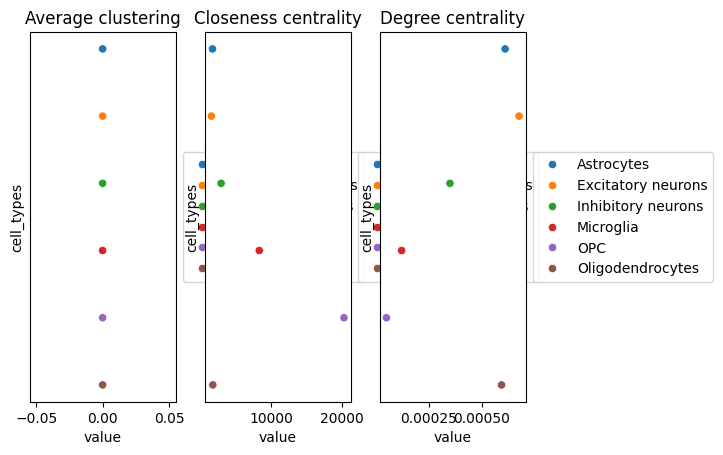

In [12]:
sq.gr.centrality_scores(adata, cluster_key = "cell_types", connectivity_key = "radius_based_spatial")
sq.pl.centrality_scores(adata, cluster_key = "cell_types")

### 1.1.  Differential analysis

Once we have a graph construction suitable for the data representation we can perform multiple differential analysis between the different conditions (TgCRND8 vs wildtype). 

GraphCompass [1] introduces analysis methods across conditions. 

GraphCompass Tutorial: https://github.com/theislab/graphcompass/blob/main/notebooks/tutorials/MIBITOF_breast_cancer.ipynb

#### 1.1.1 Comparing entire graphs

GraphCompass introduces two holistic graph comparison metrics:

1. Westfeiler-Lehman Graph Kernels 
2. Filtration curves

Both methods compute a graph embedding that can be compared against one another. The graph embeddings are stored in `adata.uns["wl_kernel"]` and `adata.uns["filtration_curves"]` respectively.

In [4]:
if "unknown" not in adata.obs["cell_types"].cat.categories:
    adata.obs["cell_types"] = adata.obs["cell_types"].cat.add_categories("unknown")

adata.obs["cell_types"] = adata.obs["cell_types"].fillna("unknown")

In [5]:
library_key = "batch_key"
cluster_key = "cell_types"
condition_key = "condition"

To lower the computational load we sub-sample the data. Let's take a subsample from the different conditions but same time points.

In [6]:
# Creating a DataFrame from 'split', 'fov', and 'condition'
df = adata.obs[['condition', 'time']]
value_counts = pd.DataFrame(df.values, columns=df.columns).value_counts()
print(value_counts)

condition  time
TgCRND8    17_9    60825
wildtype   13_4    59886
           5_7     58683
TgCRND8    5_7     58681
wildtype   2_5     58230
TgCRND8    2_5     53904
Name: count, dtype: int64


In [7]:
sub_adata = adata[adata.obs['time'] == '5_7']
sub_adata

View of AnnData object with n_obs × n_vars = 117364 × 347
    obs: 'cell_id', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'region', 'cell_labels', 'condition', 'time', 'batch_key', 'leiden_res0_25', 'leiden_res0_5', 'leiden_res1', 'cell_types'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'dea_leiden_res0_25', 'dendrogram_leiden_res0_25', 'leiden', 'leiden_res0_25_colors', 'leiden_res0_5_colors', 'leiden_res1_colors', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    obsp: 'connectivities', 'distances'

#### 1.1.1.1 Westfeiler-Lehman Graph Kernels

In [ ]:
gc.tl.wlkernel.compare_conditions(
   adata=sub_adata,
   library_key=library_key,
   cluster_key=cluster_key,
   compute_spatial_graphs=True,
   kwargs_spatial_neighbors={
        'coord_type': 'generic',
        'delaunay': True,  
  }  
)

Computing spatial graphs...


/ictstr01/groups/ml01/workspace/francesca.drummer/mamba/envs/spatial/lib/python3.9/site-packages/squidpy/gr/_utils.py:194: ImplicitModificationWarning: Setting element `.obsp['spatial_connectivities']` of view, initializing view as actual.
  obj[key] = data
100%|██████████| 1000/1000 [00:03<00:00, 331.11/s]


Defining node features...


100%|██████████| 2/2 [06:19<00:00, 189.61s/it]
INFO:root:Continuous node features provided, using CONTINUOUS propagation scheme.


Computing Wasserstein distance between conditions...


/ictstr01/groups/ml01/workspace/francesca.drummer/mamba/envs/spatial/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/ictstr01/groups/ml01/workspace/francesca.drummer/mamba/envs/spatial/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:277: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


In [ ]:
control_group="normal"  # reference group
metric_key="wasserstein_distance" 
method="wl_kernel"

In [ ]:
gc.pl.wlkernel.compare_conditions(
    adata=sub_adata,
    library_key=library_key,
    condition_key=condition_key,
    control_group=control_group,
    metric_key=metric_key,
    method=method,
    figsize=(3,5),
    dpi=100,
)

#### 1.1.1.2 Filtration curves

In [ ]:
gc.tl.filtration_curves.compare_conditions(
    adata=sub_adata,
    library_key=library_key,
    cluster_key=cluster_key,
    condition_key=condition_key,
    compute_spatial_graphs=False,
)

In [ ]:
node_labels=["Astrocytes", "Microglia", "Oligodendrocytes"]  # node labels (e.g. cell types) we are interested in visualising
metric_key="filtration_curves"

In [ ]:
gc.pl.filtration_curves.compare_conditions(
    adata=adata,
    node_labels=node_labels,
    metric_key=metric_key,
    palette="Set2",
    dpi=100,
    figsize=(20,6),
    right=4,  # to shorten the x-axis and improve readability
)

## 2. BANSKY

In this notebook we are using the Python implementation of [BANSKY](https://github.com/prabhakarlab/Banksy_py). 

In [5]:
from banksy_utils.load_data import load_adata, display_adata

from banksy_utils.filter_utils import normalize_total, filter_hvg, print_max_min

# Normalizes the AnnData object
adata_section = normalize_total(adata)

--- Max-Min before normalization -----
Displaying max and min of Dataset
Max: 148.0, Min: 0.0

--- Max-Min after normalization -----
Displaying max and min of Dataset
Max: 204.0, Min: 0.0



BANSKY requires three preperation steps:

1. Creating a kNN graph.
2. Assigning weights to the edges of the conected spatial graph.

First, we set the required parameters.

In [6]:
coord_keys = ('x', 'y', 'spatial')

# set parameters 
plot_graph_weights = True
k_geom = 15 # number of neighbors
max_m = 1 # azumithal transform up to kth order
nbr_weight_decay = "scaled_gaussian" # can also be "reciprocal", "uniform" or "ranked"

### Construct the $k_{geom}$-NN graph

In [7]:
from banksy.main import median_dist_to_nearest_neighbour

# Find median distance to closest neighbours, the median distance will be `sigma`
nbrs = median_dist_to_nearest_neighbour(adata_section, key = coord_keys[2])


Median distance to closest cell = 4.294764798125505

---- Ran median_dist_to_nearest_neighbour in 1.74 s ----



### Generate spatial weights from distance


Median distance to closest cell = 4.294764798125505

---- Ran median_dist_to_nearest_neighbour in 1.69 s ----

---- Ran generate_spatial_distance_graph in 3.72 s ----

---- Ran row_normalize in 1.06 s ----

---- Ran generate_spatial_weights_fixed_nbrs in 12.67 s ----

----- Plotting Edge Histograms for m = 0 -----

Edge weights (distances between cells): median = 13.30622241215317, mode = 11.847975456189573

---- Ran plot_edge_histogram in 0.53 s ----


Edge weights (weights between cells): median = 0.05770508134835549, mode = 0.03550420713077828

---- Ran plot_edge_histogram in 0.20 s ----

---- Ran generate_spatial_distance_graph in 5.68 s ----

---- Ran theta_from_spatial_graph in 2.60 s ----

---- Ran row_normalize in 1.06 s ----

---- Ran generate_spatial_weights_fixed_nbrs in 17.98 s ----

----- Plotting Edge Histograms for m = 1 -----

Edge weights (distances between cells): median = 18.169984776077122, mode = 14.632507007095072

---- Ran plot_edge_histogram in 0.25 s ----



/ictstr01/groups/ml01/workspace/francesca.drummer/mamba/envs/spatial/lib/python3.9/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/ictstr01/groups/ml01/workspace/francesca.drummer/mamba/envs/spatial/lib/python3.9/site-packages/numpy/lib/histograms.py:839: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
/ictstr01/groups/ml01/workspace/francesca.drummer/mamba/envs/spatial/lib/python3.9/site-packages/matplotlib/axes/_axes.py:6857: ComplexWarning: Casting complex values to real discards the imaginary part
  bins = np.array(bins, float)  # causes problems if float16
/ictstr01/groups/ml01/workspace/francesca.drummer/mamba/envs/spatial/lib/python3.9/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)



Edge weights (weights between cells): median = (-9.183662866722061e-06+0.0016620344412800192j), mode = -0.012185419915414997

---- Ran plot_edge_histogram in 0.89 s ----

----- Plotting Weights Graph -----
Maximum weight: 0.22190010753367653

---- Ran plot_graph_weights in 51.02 s ----

Maximum weight: (0.09540416526908366+0.030723023643979094j)

---- Ran plot_graph_weights in 97.78 s ----

----- Plotting theta Graph -----


/ictstr01/groups/ml01/workspace/francesca.drummer/mamba/envs/spatial/lib/python3.9/site-packages/matplotlib/collections.py:423: ComplexWarning: Casting complex values to real discards the imaginary part
  renderer.draw_path_collection(


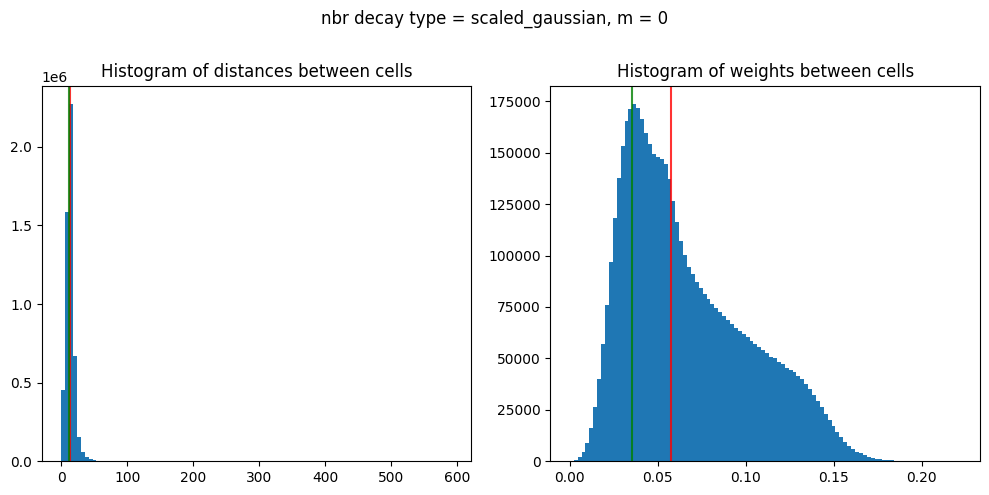

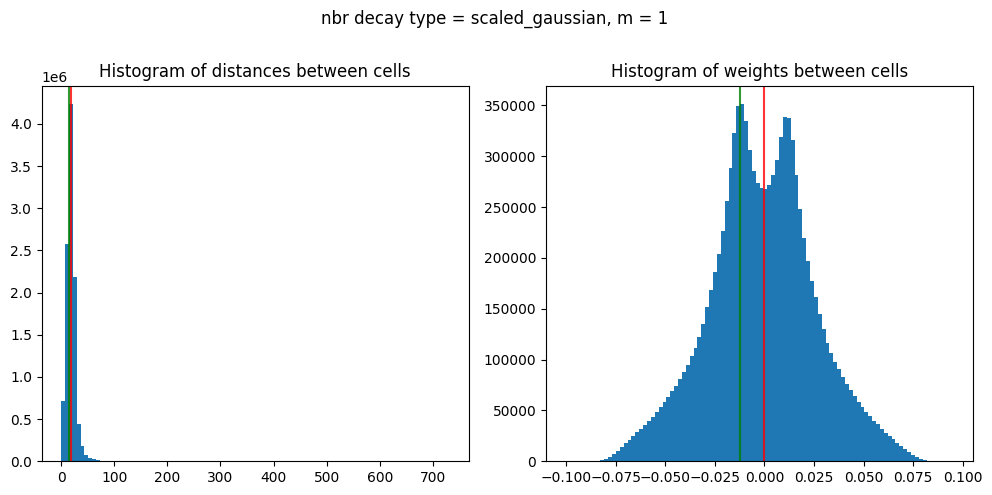

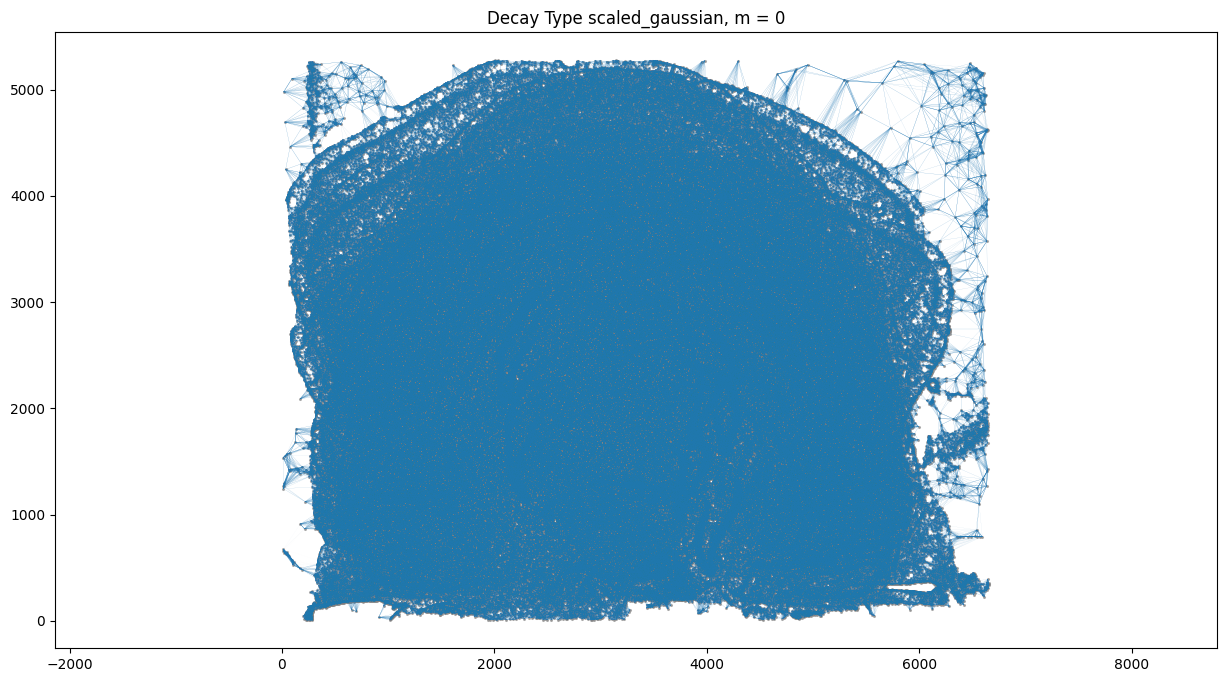

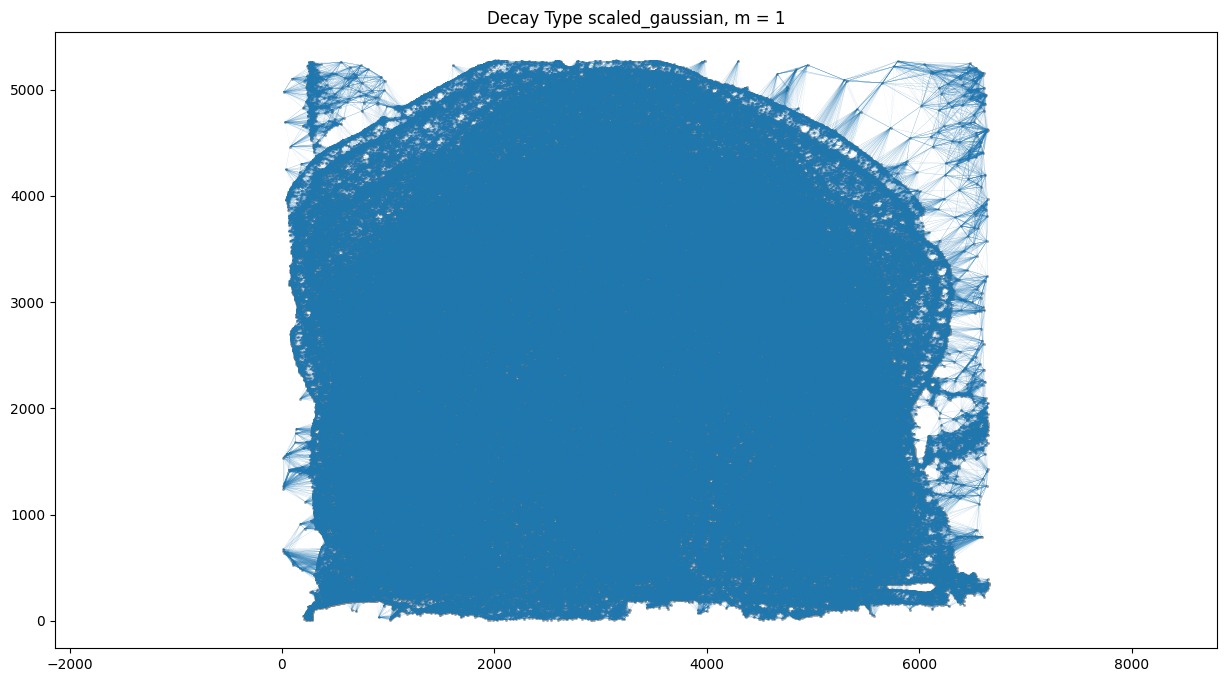

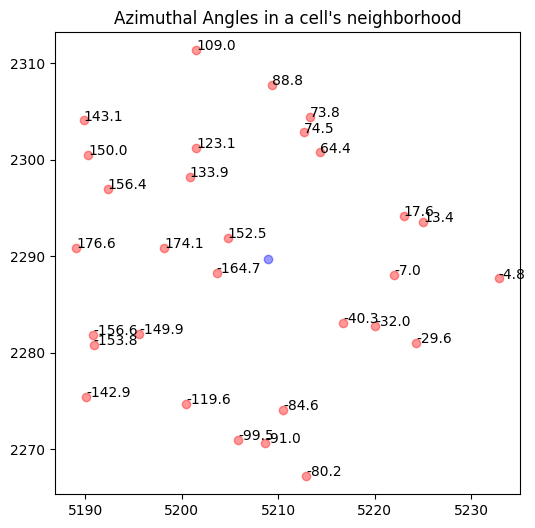

In [8]:
from banksy.initialize_banksy import initialize_banksy

plt.style.use('default')

banksy_dict = initialize_banksy(
    adata_section,
    coord_keys,
    k_geom,
    nbr_weight_decay=nbr_weight_decay,
    max_m=max_m,
    plt_edge_hist=True,
    plt_nbr_weights=True,
    plt_agf_angles=False, # takes long time to plot
    plt_theta=True,
)

### Generate BANKSY matrix

In [9]:
from banksy.embed_banksy import generate_banksy_matrix

# The following are the main hyperparameters for BANKSY
resolutions = [0.1] # clustering resolution for UMAP
pca_dims = [20] # Dimensionality in which PCA reduces to
lambda_list = [0.6] # list of lambda parameters

banksy_dict, banksy_matrix = generate_banksy_matrix(adata_section, banksy_dict, lambda_list, max_m)

Runtime Dec-18-2024-11-29

347 genes to be analysed:
Gene List:
Index(['2010300C02Rik', 'Abca7', 'Acsbg1', 'Acta2', 'Acvrl1', 'Adamts2',
       'Adamtsl1', 'Adgrl4', 'Aldh1a2', 'Aldh1l1',
       ...
       'Unc13c', 'Vat1l', 'Vcan', 'Vim', 'Vip', 'Vwc2l', 'Wfs1', 'Zfp366',
       'Zfp536', 'Zfpm2'],
      dtype='object', length=347)

Check if X contains only finite (non-NAN) values
Decay Type: scaled_gaussian
Weights Object: {'weights': {0: <350209x350209 sparse matrix of type '<class 'numpy.float64'>'
	with 5253135 stored elements in Compressed Sparse Row format>, 1: <350209x350209 sparse matrix of type '<class 'numpy.complex128'>'
	with 10506270 stored elements in Compressed Sparse Row format>}}

Nbr matrix | Mean: 0.59 | Std: 1.56
Size of Nbr | Shape: (350209, 347)
Top 3 entries of Nbr Mat:

[[0.6555883  0.07813993 0.26194284]
 [0.27732676 0.13242874 0.64368305]
 [0.41058018 0.00903952 0.42045756]]

AGF matrix | Mean: 0.15 | Std: 0.28
Size of AGF mat (m = 1) | Shape: (350209, 347)
T

In [10]:
from banksy.main import concatenate_all

banksy_dict["nonspatial"] = {
    # Here we simply append the nonspatial matrix (adata.X) to obtain the nonspatial clustering results
    0.0: {"adata": concatenate_all([adata_section.X], 0, adata=adata_section), }
}

print(banksy_dict['nonspatial'][0.0]['adata'])

Scale factors squared: [1.]
Scale factors: [1.]
AnnData object with n_obs × n_vars = 350209 × 347
    obs: 'cell_id', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'region', 'cell_labels', 'condition', 'time', 'batch_key', 'leiden_res0_25', 'leiden_res0_5', 'leiden_res1', 'cell_types'
    var: 'gene_ids', 'feature_types', 'genome', 'is_nbr', 'k'


In [ ]:
from banksy_utils.umap_pca import pca_umap

pca_umap(banksy_dict,
         pca_dims = pca_dims,
         add_umap = True,
         plt_remaining_var = False,
         )

In [ ]:
from banksy.cluster_methods import run_Leiden_partition
seed = 0
results_df, max_num_labels = run_Leiden_partition(
    banksy_dict,
    resolutions,
    num_nn = 50,
    num_iterations = -1,
    partition_seed = seed,
    match_labels = True,
)

### Plot results

In [ ]:
from banksy.plot_banksy import plot_results

c_map =  'tab20' # specify color map
weights_graph =  banksy_dict['scaled_gaussian']['weights'][0]

In [ ]:
banksy_path = f'./outputs/banksy_output/' 

plot_results(
    results_df,
    weights_graph,
    c_map,
    match_labels = True,
    coord_keys = coord_keys,
    max_num_labels  =  max_num_labels, 
    save_path = os.path.join(banksy_path, 'tmp_png'),
    save_fig = True, # save the spatial map of all clusters
    save_seperate_fig = True, # save the figure of all clusters plotted seperately
)

In [ ]:
#  Record the end time
end_time = time.time()

# Calculate elapsed time in minutes
elapsed_time = (end_time - start_time) / 60
print(f"Execution Time Banksy: {elapsed_time:.2f} minutes")

### Investigate Cell Type composition in each Banksy-defined Spatial Domain

In [ ]:
def plot_sd_vs_cell_type_composition(res_df,idx):
    """
    Plots the cell type composition as a percentage across different SD (standard deviation) values.
    The data is visualized as a stacked bar plot.

    Parameters:
    - results_df_lambda05: DataFrame containing the data with columns 'labels_scaled_gaussian_pc20_nc0.50_r0.10', 'class', and others.
    - idx: string of column of interest in the DataFrame
    
    Returns:
    - None
    """
    # Step 1: Add a 'Count' column to facilitate pivoting (each row contributes a count of 1)
    res_df.obs['Count'] = 1

    # Step 2: Create a pivot table with SD as the index, cell types as columns, and the sum of counts as values
    pivot_df = res_df.obs.pivot_table(
        index=idx,  # Group by SD
        columns='class',  # Columns represent cell types
        values='Count',  # Aggregate the 'Count' column
        aggfunc='sum',  # Sum up counts for each combination
        fill_value=0  # Fill missing combinations with 0
    )

    # Ensure SD values are numeric
    pivot_df.index = pivot_df.index.astype(float)

    # Step 3: Convert counts to percentages for each SD
    # Divide each row by the row sum to get percentages, then multiply by 100
    pivot_df = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

    # Step 4: Set up the plot
    fig, ax = plt.subplots(figsize=(10, 6))  # Define figure size

    # Plot stacked bars
    bottom = None  # Keeps track of the cumulative height of the bars
    for cell_type in pivot_df.columns:  # Loop through each cell type
        ax.bar(
            pivot_df.index,  # X-axis: SD values
            pivot_df[cell_type],  # Y-axis: Percentages for this cell type
            label=cell_type,  # Legend label
            bottom=bottom  # Stack on top of previous bars
        )
        # Update 'bottom' to include the current cell type's values
        bottom = pivot_df[cell_type] if bottom is None else bottom + pivot_df[cell_type]

    # Step 5: Add labels and title
    ax.set_xlabel('SD')  # Label for the x-axis
    ax.set_ylabel('Cell Type Composition (%)')  # Label for the y-axis
    ax.set_title('SD vs. Cell Type Composition')  # Title of the plot
    ax.set_ylim(0, 100)  # Set y-axis limits to [0, 100] to represent percentages

    # Add legend
    plt.legend(
        title="Cell Type",  # Title of the legend
        bbox_to_anchor=(1.05, 1),  # Position the legend outside the plot
        loc='upper left'  # Align the legend at the upper left corner
    )

    # Adjust layout to prevent overlap
    plt.tight_layout()
    # Step 6: Show the plot
    plt.show()

In [ ]:
results_df

In [ ]:
idx='scaled_gaussian_pc20_nc0.50_r0.10'
results_df_lambda05 = results_df.loc[idx,'adata']
plot_sd_vs_cell_type_composition(results_df_lambda05,idx)

## 3. Spatial Domain detection with CellCharter

## References

[1] Ali, M. et al. GraphCompass: Spatial metrics for differential analyses of cell organization across conditions. 2024.02.02.578605 Preprint at https://doi.org/10.1101/2024.02.02.578605 (2024).

[2] Schaar, A. C. et al. Nicheformer: a foundation model for single-cell and spatial omics. 2024.04.15.589472 Preprint at https://doi.org/10.1101/2024.04.15.589472 (2024).

[3] Singhal, V. et al. BANKSY unifies cell typing and tissue domain segmentation for scalable spatial omics data analysis. Nat Genet 56, 431–441 (2024).

[4] https://github.com/BrainOmicsCourse/BrainOmics2024/tree/main/3_Day3. Last access: 18.12.2024
